In [5]:
#Problem: N-Queens

#!pip install mlrose-hiive
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

"""
fitness = mlrose.FourPeaks(t_pct=0.1)
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
fitness.evaluate(state)

"""

# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    # Initialize counter
    fitness_cnt = 0
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):
                # If no attacks, then increment counter
                fitness_cnt += 1
    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)

# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = 20, fitness_fn= fitness_cust, maximize=True, max_val=20)

# Define decay schedule for simuladed annealing
schedule = mlrose_hiive.ExpDecay()

import time
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
# Solve using randomized Hill-Climbing
startTime = time.time()
best_state_rhl, best_fitness_rhl, fitness_curve_rhl = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, restarts=0, 
                                                      max_iters = 1000, curve= True,
                                                      random_state = 42)

executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_rhl)
print('The fitness at the best state is: ', best_fitness_rhl)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_rhl)


# Solve using Simulated Annealing
startTime = time.time()
best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 1000, 
                                                      max_iters = 1000, curve= True,
                                                      random_state = 42)

executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_sa)
print('The fitness at the best state is: ', best_fitness_sa)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_sa)


# Solve using Genetic Algorithm
startTime = time.time()
best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.2, max_attempts = 1000, 
                                                      max_iters = 1000, curve= True,
                                                      random_state = 42)

executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_ga)
print('The fitness at the best state is: ', best_fitness_ga)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_ga)

# Solve using MIMIC
startTime = time.time()
best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.4, max_attempts = 1000, 
                                                      max_iters = 1000, curve= True,
                                                      random_state = 42)

executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_mimic)
print('The fitness at the best state is: ', best_fitness_mimic)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_mimic)



The best state found is:  [ 4 19 13 18 14  6  8 12 17  3  7  2 15 11 14  1  0  5 11 16]
The fitness at the best state is:  186.0
Execution time in seconds: 0.33264756202697754
The best state found is:  [ 4 14  8 10 16 13  5  1 18  0  2 11 15  3  9  6 17 19  7 15]
The fitness at the best state is:  188.0
Execution time in seconds: 0.3904578685760498
The best state found is:  [16  0 11  3 17  9  1 19  4 10 18 13  6  2 15  7 14  8  5 12]
The fitness at the best state is:  189.0
Execution time in seconds: 31.265217304229736
The best state found is:  [ 9  7 14 18  0  2 13 15 16 19  3  1  6 17 13 17 19  8  5 11]
The fitness at the best state is:  185.0
Execution time in seconds: 31.706246376037598


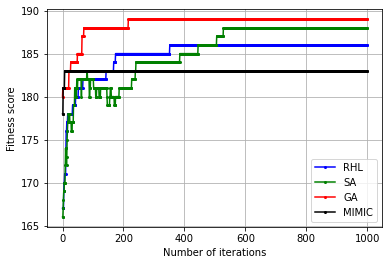

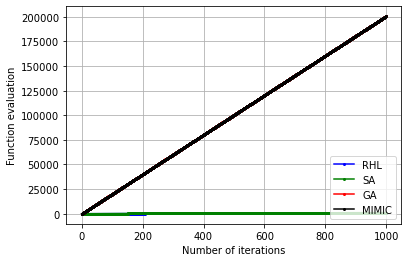

In [29]:
n=np.arange(0,1000)
plt.plot(n, fitness_curve_rhl[:,0],marker='o', markersize=2,color='blue', label='RHL')
plt.plot(n, fitness_curve_sa[:,0],marker='o', markersize=2,color='green', label='SA')
plt.plot(n, fitness_curve_ga[:,0],marker='o', markersize=2,color='red', label='GA')
plt.plot(n, fitness_curve_mimic[:,0],marker='o', markersize=2,color='black', label='MIMIC')
plt.xlabel('Number of iterations')
plt.ylabel('Fitness score')
plt.legend(loc='lower right')
plt.grid()
plt.show()

n=np.arange(0,1000)
plt.plot(n, fitness_curve_rhl[:,1]-fitness_curve_rhl[1,1],marker='o', markersize=2,color='blue', label='RHL')
plt.plot(n, fitness_curve_sa[:,1]-fitness_curve_sa[1,1],marker='o', markersize=2,color='green', label='SA')
plt.plot(n, fitness_curve_ga[:,1]-fitness_curve_ga[1,1],marker='o', markersize=2,color='red', label='GA')
plt.plot(n, fitness_curve_mimic[:,1]-fitness_curve_mimic[1,1],marker='o', markersize=2,color='black', label='MIMIC')
plt.xlabel('Number of iterations')
plt.ylabel('Function evaluation')
plt.legend(loc='lower right')
plt.grid()
plt.show()


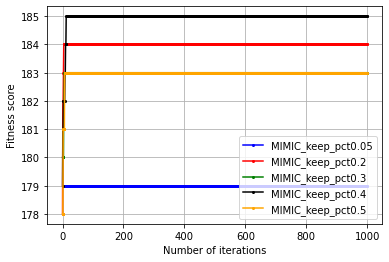

In [21]:
list_pct=[0.05,0.2,0.3,0.4,0.5]
for i in list_pct:
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=i, max_attempts = 1000, 
                                                      max_iters = 1000, curve= True,
                                                      random_state = 42)
    if i==0.05:
        color='blue'
    if i==0.2:
        color='red'
    if i==0.3:
        color='green'
    if i==0.4:
        color='black'
    if i==0.5:
        color='orange'
    n=np.arange(0,1000)
    plt.plot(n, fitness_curve_mimic[:,0],marker='o', markersize=2,color=color, label=('MIMIC_keep_pct'+str(i)))
    plt.xlabel('Number of iterations')
    plt.ylabel('Fitness score')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()


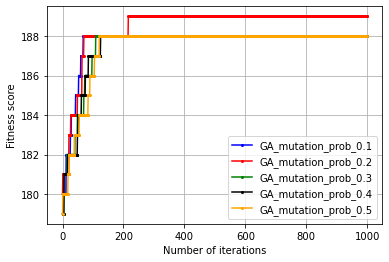

In [22]:
list_mutation=[0.1,0.2,0.3,0.4,0.5]
for i in list_mutation:
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=i, max_attempts = 1000, 
                                                      max_iters = 1000, curve= True,
                                                      random_state = 42)
    if i==0.1:
        color='blue'
    if i==0.2:
        color='red'
    if i==0.3:
        color='green'
    if i==0.4:
        color='black'
    if i==0.5:
        color='orange'
    n=np.arange(0,1000)
    plt.plot(n, fitness_curve_ga[:,0],marker='o', markersize=2,color=color, label=('GA_mutation_prob_'+str(i)))
    plt.xlabel('Number of iterations')
    plt.ylabel('Fitness score')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()

In [67]:
'''
size=20
n_size=np.arange(8,size+1)
m=size-8+1
fitness_track=np.zeros([m, 4], dtype=int)
for i in range (8,size+1):
    problem = mlrose_hiive.DiscreteOpt(length = i, fitness_fn= fitness_cust, maximize=True, max_val=8)
    best_state_rhl, best_fitness_rhl, fitness_curve_rhl = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 300, curve= True,random_state = 42)
    best_state_sa, best_fitness_sa,fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 1000, 
                                                      max_iters = 300, curve= False,
                                                      random_state = 42)
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts = 1000, 
                                                      max_iters = 300, curve= False,
                                                      random_state = 42)
    best_state_mimic, best_fitness_mimic, fitness_curbe_mimic  = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.1, max_attempts = 1000, 
                                                      max_iters = 300, curve= False,
                                                      random_state = 42)
    fitness_track[i-8,0]=best_fitness_rhl
    fitness_track[i-8,1]=best_fitness_sa
    fitness_track[i-8,2]=best_fitness_ga
    fitness_track[i-8,3]=best_fitness_mimic

#plotting the fitness score in function of the size of the problem
print(fitness_track)
'''

'\nsize=20\nn_size=np.arange(8,size+1)\nm=size-8+1\nfitness_track=np.zeros([m, 4], dtype=int)\nfor i in range (8,size+1):\n    problem = mlrose_hiive.DiscreteOpt(length = i, fitness_fn= fitness_cust, maximize=True, max_val=8)\n    best_state_rhl, best_fitness_rhl, fitness_curve_rhl = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, max_iters = 300, curve= True,random_state = 42)\n    best_state_sa, best_fitness_sa,fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 1000, \n                                                      max_iters = 300, curve= False,\n                                                      random_state = 42)\n    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts = 1000, \n                                                      max_iters = 300, curve= False,\n                                                      random_state = 42)\n

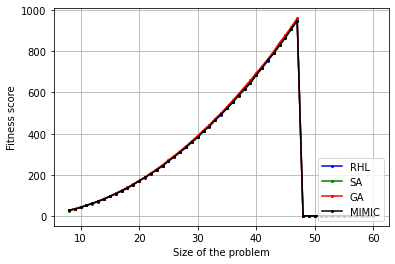

In [40]:
n_size=np.arange(8,size+1)
plt.plot(n_size, fitness_track[:,0],marker='o', markersize=2,color='blue', label='RHL')
plt.plot(n_size, fitness_track[:,1],marker='o', markersize=2,color='green', label='SA')
plt.plot(n_size, fitness_track[:,2],marker='o', markersize=2,color='red', label='GA')
plt.plot(n_size, fitness_track[:,3],marker='o', markersize=2,color='black', label='MIMIC')
plt.xlabel('Size of the problem')
plt.ylabel('Fitness score')
plt.legend(loc='lower right')
plt.grid()
plt.show()